In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import rasterio

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
gp = gpd.read_file('GP_Informal_settlement2017.shp')

In [3]:
gp

,IS_NAME,Province,District,Imagery,Year,UN_ID,Services,INT_ROAD,INT_RIVER,INT_WETLAN,INT_CAD,MUN_NAME,AREA_SKM,ID,geometry
0,Umthambeka,Gauteng,EKU,SPOT 5 2.5m,2011,EKU_19,NO,NO,NO,NO,YES,Ekurhuleni,0.0,0,"POLYGON ((28.19057 -26.02306, 28.19135 -26.022..."
1,Igqagqa,Gauteng,EKU,SPOT 5 2.5m,2011,EKU_30,NO,NO,NO,NO,None,Ekurhuleni,0.0,0,"POLYGON ((28.22206 -26.01151, 28.22230 -26.011..."
2,Isekelo,Gauteng,EKU,SPOT 5 2.5m,2011,EKU_31,NO,NO,NO,NO,None,Ekurhuleni,0.0,0,"POLYGON ((28.22676 -26.01440, 28.22684 -26.014..."
3,Inxiweni,Gauteng,EKU,SPOT 5 2.5m,2011,EKU_32,NO,NO,NO,NO,None,Ekurhuleni,0.0,0,"MULTIPOLYGON (((28.21620 -26.02384, 28.21615 -..."
4,Sophiatown,Gauteng,EKU,SPOT 5 2.5m,2011,EKU_33,NO,NO,NO,NO,None,Ekurhuleni,0.0,0,"POLYGON ((28.18576 -26.03505, 28.18697 -26.035..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,None,None,None,None,0,None,None,None,None,None,None,None,0.0,0,"POLYGON ((28.05956 -25.53133, 28.05944 -25.531..."
348,None,None,None,None,0,None,None,None,None,None,None,None,0.0,0,"POLYGON ((28.04468 -25.52984, 28.04503 -25.529..."
349,None,None,None,None,0,None,None,None,None,None,None,None,0.0,0,"POLYGON ((28.03766 -25.53672, 28.03532 -25.536..."
350,None,None,None,None,0,None,None,None,None,None,None,None,0.0,0,"POLYGON ((28.02550 -25.55980, 28.02575 -25.558..."


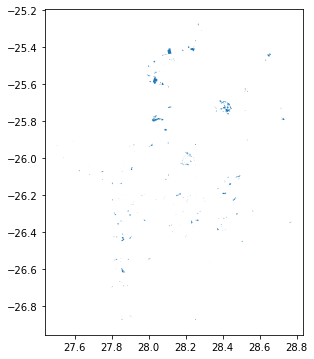

In [4]:
gp.plot(figsize=(6, 6))

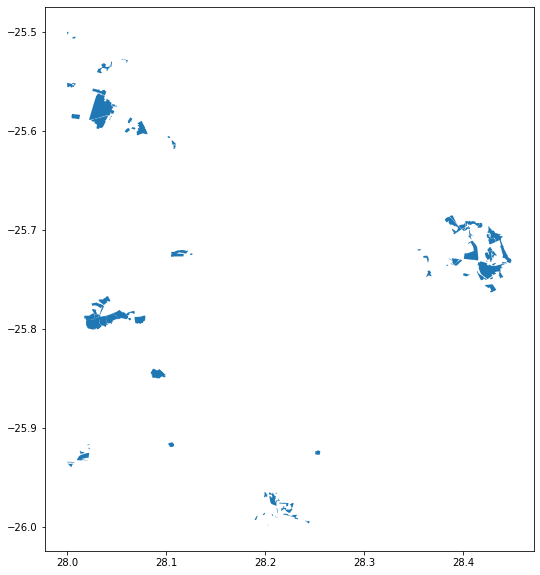

In [5]:
from shapely.geometry import Polygon, Point

# Clipping to the extent of our raster (Which happens to contain lots of informal setlements)
lat_point_list = [-26, -25.5, -25.5, -26]
lon_point_list = [28, 28, 28.5, 28.5]
polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
roi = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[polygon_geom])       
gp = gpd.clip(gp, roi)
gp.plot(figsize=(10, 10))

In [6]:
import numpy as np

In [7]:
lats = []
lons = []
labels = []
np.random.seed(4)
for i in range(500000):
    lon = 28 + np.random.random()*0.5
    lat = -26 + np.random.random()*0.5
    p = Point(lon, lat)
    IN = False
    for geom in gp.geometry:
        if p.within(geom):
            IN = True
    lats.append(lat)
    lons.append(lon)
    labels.append(IN)
ls = pd.DataFrame({
    'LAT':lats,
    'LON':lons,
    'Label':labels
})
ls.sample(10)

,LAT,LON,Label
376391,-25.809359,28.023455,False
201902,-25.690696,28.273118,False
343490,-25.600814,28.427948,False
372545,-25.820023,28.243598,False
477724,-25.882650,28.481440,False
494520,-25.757423,28.078740,False
325570,-25.861835,28.033731,False
50327,-25.879683,28.470587,False
308923,-25.714146,28.365602,False
166551,-25.719665,28.398143,False


In [8]:
ls['Label'].value_counts()

False    493924
True       6076
Name: Label, dtype: int64

In [9]:
ls

,LAT,LON,Label
0,-25.726384,28.483515,False
1,-25.642592,28.486342,False
2,-25.891955,28.348864,False
3,-25.996885,28.488137,False
4,-25.782604,28.126491,False
...,...,...,...
499995,-25.994049,28.426430,False
499996,-25.964562,28.131431,False
499997,-25.778068,28.040785,False
499998,-25.643900,28.381094,False


In [10]:
ls[ls['Label'] == True]

,LAT,LON,Label
77,-25.585291,28.044386,True
115,-25.711384,28.433062,True
223,-25.847829,28.097199,True
312,-25.930931,28.015946,True
328,-25.760903,28.432071,True
...,...,...,...
499772,-25.553946,28.004682,True
499850,-25.789608,28.044225,True
499949,-25.740799,28.419963,True
499955,-25.747588,28.424418,True


In [11]:
np.random.seed(7)
false_lats = []
false_lons = []
false_labels = []
for row in ls[ls['Label'] == True].iterrows():
    lat = row[1]['LAT']
    lon = row[1]['LON']
    for j in range(3):
        false_lon = lon + np.random.random()*0.2
        false_lat = lat + np.random.random()*0.2
        p = Point(false_lon, false_lat)
        IN = False
        for geom in gp.geometry:
            if p.within(geom):
                IN = True
        if IN == False:
            false_lats.append(lat)
            false_lons.append(lon)
            false_labels.append(IN)

In [12]:
false_ls = pd.DataFrame({
    'LAT':false_lats,
    'LON':false_lons,
    'Label':false_labels
})

In [13]:
new_df = pd.concat([ls[ls['Label'] == True], false_ls])

In [14]:
new_df['Label'].value_counts()

False    18122
True      6076
Name: Label, dtype: int64

In [15]:
1165*3

3495

In [16]:
new_df['Label'] *= 1

In [17]:
new_gdf = gpd.GeoDataFrame(new_df, geometry = gpd.points_from_xy(new_df.LON, new_df.LAT))

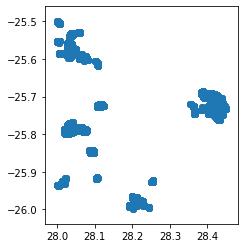

In [18]:
new_gdf.plot()

<Figure size 864x864 with 0 Axes>

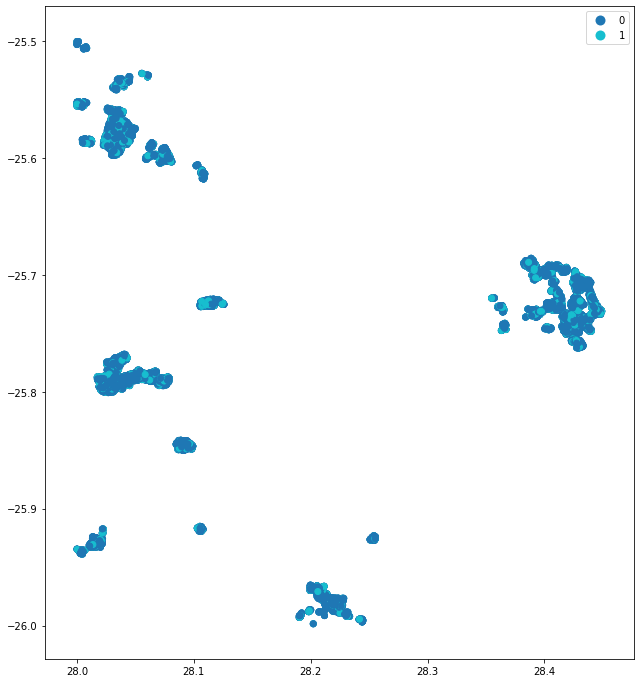

In [19]:
plt.figure(figsize=(12, 12))
new_gdf.sample(frac = 1, random_state=2).plot(column = 'Label', categorical=True, legend=True, figsize=(12, 12))
# plt.legend()

In [20]:
new_gdf = new_gdf.sample(frac=1, random_state=2)

In [21]:
new_gdf['ID'] = np.arange(0, len(new_gdf))
new_gdf['ID'] = new_gdf['ID'].astype('str')

In [22]:
new_gdf[['ID', 'LAT', 'LON', 'Label']].to_csv('diff_data_2.csv', index=False)

In [24]:
new_gdf['Label'].value_counts(normalize=True)

0    0.748905
1    0.251095
Name: Label, dtype: float64